import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df1=pd.read_csv('Laptop_Price.csv')
df1=df1.dropna()

*Univariant - histogram using matplotlib*

(array([ 29., 279., 197., 421., 204.,  82.,  27.,  11.,   8.,  27.]),
 array([0.69 , 1.091, 1.492, 1.893, 2.294, 2.695, 3.096, 3.497, 3.898,
        4.299, 4.7  ]),
 <BarContainer object of 10 artists>)

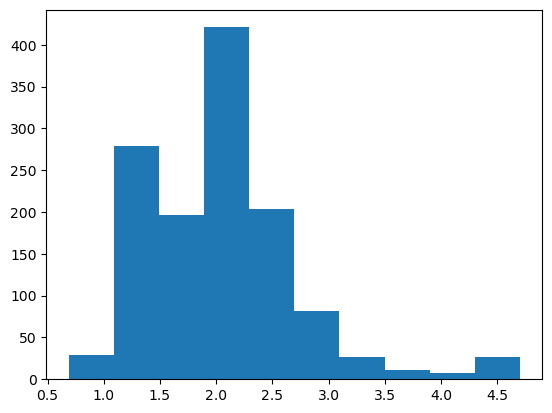

In [3]:
plt.hist(df1['Weight'],bins=10)

*figure,ylabel,xlabel,title*

Text(0.5, 1.0, 'diagram')

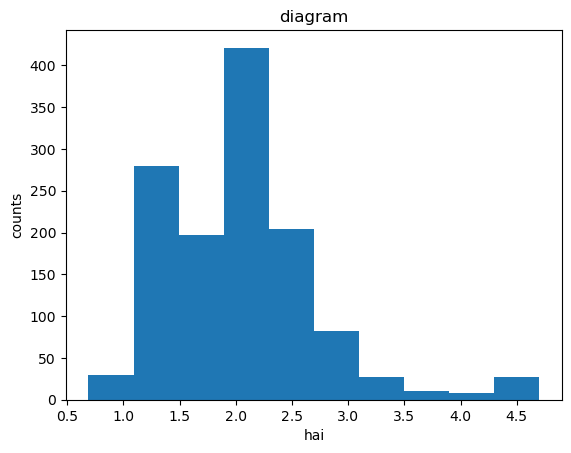

In [4]:
a=plt.hist(df1['Weight'],bins=10)
plt.xlabel('hai')
plt.ylabel('counts')
plt.title('diagram')

<Axes: xlabel='Weight', ylabel='Count'>

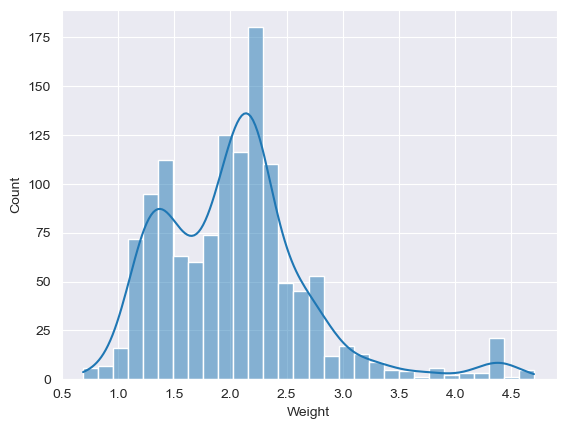

In [5]:
import seaborn as sns

sns.set_style('darkgrid')

sns.histplot(x=df1['Weight'],data=df1,bins=30,kde=True)

